In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('expense.csv')

In [138]:
df.head()

,year,month,debt,rent,employee_count,marketing
0,2017,Jan,5026,4015,500,2576
1,2017,Feb,5030,4029,501,2193
2,2017,Mar,5049,4062,502,2666
3,2017,Apr,5050,4069,502,2679
4,2017,May,5066,4084,502,2506


In [139]:
df['month_year'] = df['month'] + " " + df['year'].astype(str)
df['month_year']

0     Jan 2017
1     Feb 2017
2     Mar 2017
3     Apr 2017
4     May 2017
5     Jun 2017
6     Jul 2017
7     Aug 2017
8     Sep 2017
9     Oct 2017
10    Nov 2017
11    Dec 2017
12    Jan 2018
13    Feb 2018
14    Mar 2018
15    Apr 2018
16    May 2018
17    Jun 2018
18    Jul 2018
19    Aug 2018
20    Sep 2018
21    Oct 2018
22    Nov 2018
23    Dec 2018
24    Jan 2019
25    Feb 2019
26    Mar 2019
27    Apr 2019
28    May 2019
29    Jun 2019
30    Jul 2019
31    Aug 2019
32    Sep 2019
33    Oct 2019
34    Nov 2019
35    Dec 2019
36    Jan 2020
37    Feb 2020
38    Mar 2020
39    Apr 2020
40    May 2020
41    Jun 2020
42    Jul 2020
43    Aug 2020
44    Sep 2020
45    Oct 2020
46    Nov 2020
47    Dec 2020
48    Jan 2021
49    Feb 2021
50    Mar 2021
51    Apr 2021
52    May 2021
53    Jun 2021
54    Jul 2021
55    Aug 2021
56    Sep 2021
57    Oct 2021
58    Nov 2021
59    Dec 2021
Name: month_year, dtype: object

In [140]:
data = df[df.columns[2:]]
data

,debt,rent,employee_count,marketing,month_year
0,5026,4015,500,2576,Jan 2017
1,5030,4029,501,2193,Feb 2017
2,5049,4062,502,2666,Mar 2017
3,5050,4069,502,2679,Apr 2017
4,5066,4084,502,2506,May 2017
5,5112,4089,502,3486,Jun 2017
6,5138,4102,502,3875,Jul 2017
7,5169,4120,502,3523,Aug 2017
8,5249,4133,502,2208,Sep 2017
9,5253,4134,502,3864,Oct 2017


In [141]:
df_predict = data[41:]

In [142]:
from sklearn.preprocessing import MinMaxScaler

exp_list = [i for i in df_predict.columns if i != 'month_year']
scaler = MinMaxScaler()
scaled_predict = scaler.fit_transform(df_predict[exp_list])

In [143]:
def split_sequence(sequence, look_back, forecast_horizon):
    
    X, y = list(), list()
    for i in range(len(sequence)) :
        lag_end = i + look_back
        forecast_end = lag_end + forecast_horizon
        if forecast_end > len(sequence) :
            break
        seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [144]:
LOOK_BACK = 6
FORECAST_RANGE = 2
n_features = len(exp_list)

X_predict, y_predict = split_sequence(scaled_predict, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)

In [145]:
X_predict.shape

(12, 6, 4)

In [146]:
def inverse_transform(y_test, y_hat):
    y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])
    y_hat_reshaped = y_hat.reshape(-1, y_hat.shape[-1])
    
    y_hat_inverse = scaler.inverse_transform(y_hat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)
    
    return y_hat_inverse, y_test_inverse

In [147]:
from tensorflow.keras.models import load_model

model = load_model('multi_head_cnn_lstm_model.h5')

In [148]:
y_pred = model.predict(X_predict)

1/1 [==============================] - 1s 520ms/step


In [149]:
y_pred_inverse, y_test_inverse = inverse_transform(y_predict, y_pred)

In [150]:
y_pred_plot = y_pred_inverse[::2]
y_pred_plot

array([[6459.098  , 4779.     ,  547.5552 , 2742.447  ],
       [6472.3687 , 4786.811  ,  547.86426, 2798.5593 ],
       [6495.5327 , 4802.921  ,  548.54944, 2885.3452 ],
       [6507.336  , 4810.698  ,  548.87177, 2929.955  ],
       [6519.883  , 4817.822  ,  549.1892 , 2963.4595 ],
       [6536.061  , 4829.5015 ,  549.7025 , 3018.0427 ],
       [6554.9185 , 4842.909  ,  550.28033, 3075.3708 ],
       [6567.2275 , 4850.1978 ,  550.5847 , 3107.1301 ],
       [6569.876  , 4853.0938 ,  550.77856, 3109.4758 ],
       [6589.0337 , 4864.4985 ,  551.2301 , 3177.4607 ],
       [6606.249  , 4877.4663 ,  551.8114 , 3223.887  ],
       [6633.034  , 4894.33   ,  552.5289 , 3312.1252 ]], dtype=float32)

In [151]:
y_test_plot = y_test_inverse[::2]
y_test_plot

array([[6561., 4780.,  550., 4500.],
       [6576., 4780.,  553., 3927.],
       [6587., 4815.,  553., 2459.],
       [6598., 4831.,  553., 3582.],
       [6606., 4845.,  553., 3472.],
       [6613., 4891.,  553., 2744.],
       [6618., 4901.,  553., 3440.],
       [6629., 4901.,  556., 2037.],
       [6654., 4922.,  556., 3074.],
       [6732., 4960.,  556., 3286.],
       [6739., 4971.,  557., 3086.],
       [6755., 4975.,  559., 2920.]])

#### Predicting for year 2021

In [155]:
df[48:]['month_year'].to_list()

['Jan 2021',
 'Feb 2021',
 'Mar 2021',
 'Apr 2021',
 'May 2021',
 'Jun 2021',
 'Jul 2021',
 'Aug 2021',
 'Sep 2021',
 'Oct 2021',
 'Nov 2021',
 'Dec 2021']

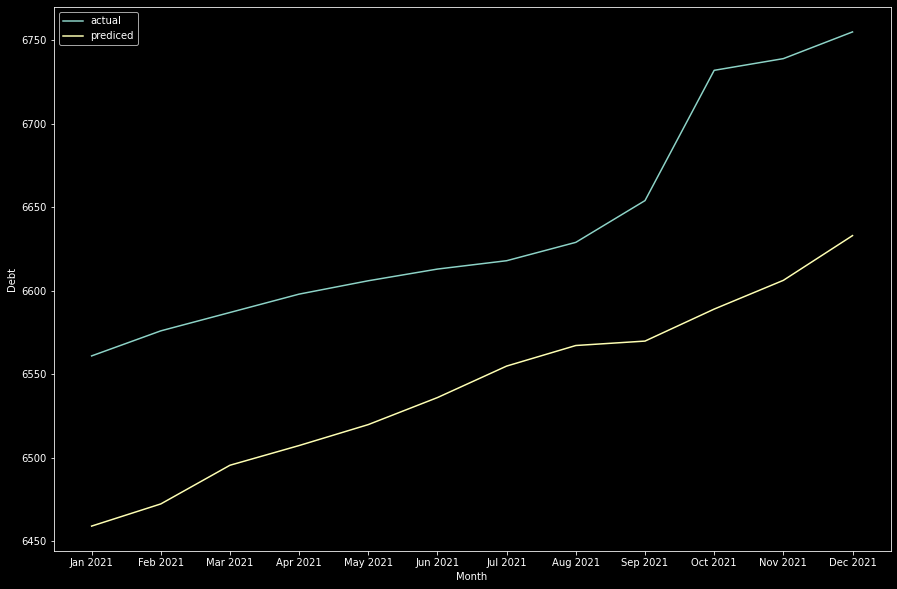

In [158]:
### plot between the actual_debt and predicted_debt 

x = df[48:]['month_year'].to_list()

plt.figure(figsize=(15, 10))
plt.plot(x, y_test_plot[:, 0], label='actual')
plt.plot(x, y_pred_plot[:, 0], label='prediced')
plt.xlabel("Month")
plt.ylabel("Debt")
plt.legend()
plt.show()

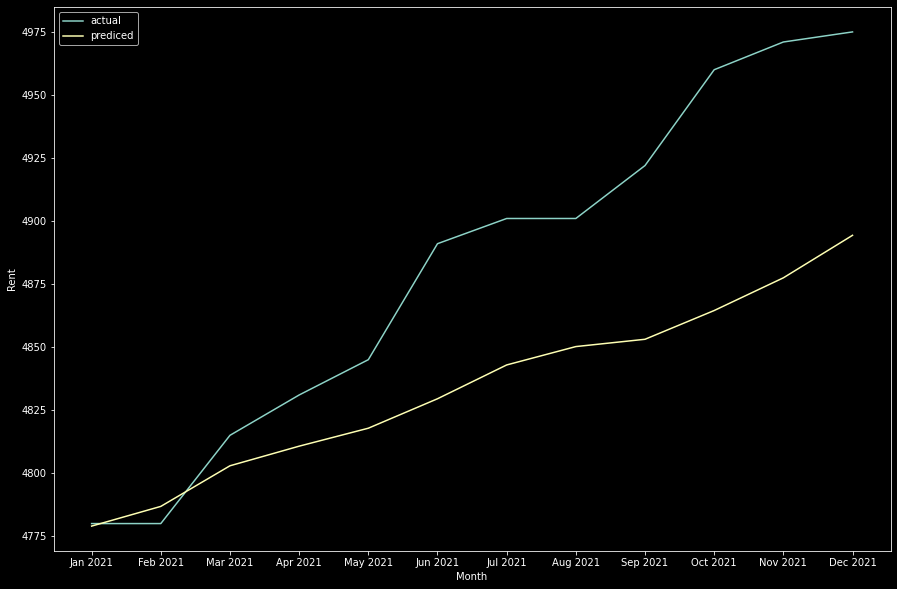

In [159]:
### plot between the actual_rent and predicted_rent 

plt.figure(figsize=(15, 10))
plt.plot(x, y_test_plot[:, 1], label='actual')
plt.plot(x, y_pred_plot[:, 1], label='prediced')
plt.xlabel("Month")
plt.ylabel("Rent")
plt.legend()
plt.show()

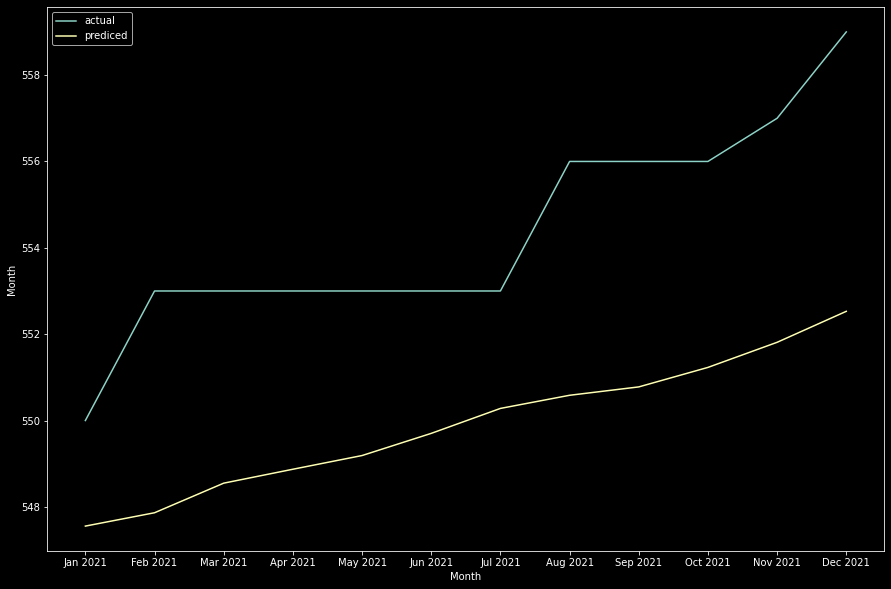

In [160]:
### plot between the actual_employee and predicted_employee

plt.figure(figsize=(15, 10))
plt.plot(x, y_test_plot[:, 2], label='actual')
plt.plot(x, y_pred_plot[:, 2], label='prediced')
plt.xlabel("Month")
plt.ylabel("Employee")
plt.legend()
plt.show()

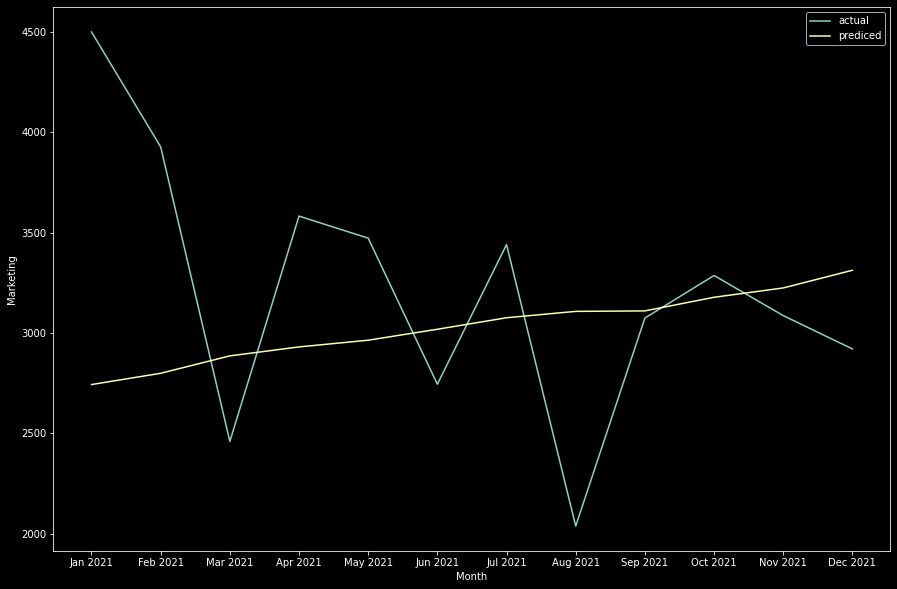

In [161]:
### plot between the actual_marketing and predicted_marketing expense

plt.figure(figsize=(15, 10))
plt.plot(x, y_test_plot[:, 3], label='actual')
plt.plot(x, y_pred_plot[:, 3], label='prediced')
plt.xlabel("Month")
plt.ylabel("Marketing")
plt.legend()
plt.show()

In [162]:
np.sum(y_pred_plot)

179462.06

In [163]:
actual_expense = np.sum(y_test_plot)
pred_expense = np.sum(y_pred_plot)

print(f'The actual expense of company is {actual_expense} and predicted expense is {pred_expense}')

The actual expense of company is 183419.0 and predicted expense is 179462.0625
